In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

Date = []
Recommended = []
reviews = []
SeatType = []
TypeOfTraveller = []
Route = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Getting reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    # Getting seat type
    for para in parsed_content.find_all("tr"):
      if para.find("td",{"class": "review-rating-header cabin_flown"}, string="Seat Type"):
        SeatType.append(para.get_text().replace("Seat Type",""))

   # Getting recommendation
    for para in parsed_content.find_all("table", {"class": "review-ratings"}):
      recommend_element = para.find('td', {'class': ['review-value rating-yes', 'review-value rating-no']})
      if recommend_element is not None:
        Recommended.append(recommend_element.string[0])

   # Type Of Traveller
    for para in parsed_content.find_all("tr"):
      if para.find("td",{"class":"review-rating-header type_of_traveller"},string="Type Of Traveller"):
        TypeOfTraveller.append(para.get_text().replace("Type Of Traveller",""))

   # Date of review
    for para in parsed_content.find_all("time", {"itemprop": "datePublished"}):
      Date.append(para.get_text())

   # Getting route
    for para in parsed_content.find_all("tr"):
      if para.find("td",{"class": "review-rating-header route"}, string="Route"):
        Route.append(para.get_text().replace("Route",""))


    print(f"   ---> {len(Date)} total date")
    print(f"   ---> {len(Recommended)} total recommended")
    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(SeatType)} total SeatType")
    print(f"   ---> {len(TypeOfTraveller)} total TypeOfTraveller")
    print(f"   ---> {len(Route)} total Route")

Scraping page 1
   ---> 100 total date
   ---> 100 total recommended
   ---> 100 total reviews
   ---> 100 total SeatType
   ---> 100 total TypeOfTraveller
   ---> 100 total Route
Scraping page 2
   ---> 200 total date
   ---> 200 total recommended
   ---> 200 total reviews
   ---> 200 total SeatType
   ---> 199 total TypeOfTraveller
   ---> 200 total Route
Scraping page 3
   ---> 300 total date
   ---> 300 total recommended
   ---> 300 total reviews
   ---> 300 total SeatType
   ---> 299 total TypeOfTraveller
   ---> 299 total Route
Scraping page 4
   ---> 400 total date
   ---> 400 total recommended
   ---> 400 total reviews
   ---> 400 total SeatType
   ---> 399 total TypeOfTraveller
   ---> 399 total Route
Scraping page 5
   ---> 500 total date
   ---> 500 total recommended
   ---> 500 total reviews
   ---> 500 total SeatType
   ---> 498 total TypeOfTraveller
   ---> 498 total Route
Scraping page 6
   ---> 600 total date
   ---> 600 total recommended
   ---> 600 total reviews
   --

In [3]:
max_length = max(len(Date), len(Recommended), len(reviews), len(SeatType), len(TypeOfTraveller),len(Route))

# Duplicate the last element of the shorter lists
for var_list in [Date, Recommended, reviews, SeatType, TypeOfTraveller,Route]:
    while len(var_list) < max_length:
        last_element = var_list[-1]
        var_list.append(last_element)

In [4]:
df = pd.DataFrame({
    "date_of_review": Date,
    "recommended": Recommended,
    "reviews": reviews,
    "seat_type": SeatType,
    "type_of_traveller": TypeOfTraveller,
    "route": Route
})


df.head(10)

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route
0,12th April 2024,n,✅ Trip Verified | We chose Rotterdam and Lond...,Economy Class,Couple Leisure,Rotterdam to London City
1,10th April 2024,n,✅ Trip Verified | The entire booking and ticke...,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow
2,10th April 2024,n,Not Verified | British Airways cancelled my ...,Economy Class,Family Leisure,Tenerife to London
3,7th April 2024,y,Not Verified | I wanted to write this review s...,Business Class,Business,Lisbon to San Diego
4,3rd April 2024,y,✅ Trip Verified | Check in fast and friendly....,Business Class,Business,London Heathrow to Mumbai
5,2nd April 2024,n,✅ Trip Verified | This is the first time I ha...,Business Class,Couple Leisure,Doha to London Heathrow
6,2nd April 2024,n,✅ Trip Verified | Flew business class from Do...,Business Class,Couple Leisure,Doha to London Heathrow
7,28th March 2024,y,✅ Trip Verified | Starting off at Heathrow Te...,Business Class,Solo Leisure,London Heathrow to São Paulo
8,28th March 2024,n,Not Verified | We have flown this route with ...,Economy Class,Couple Leisure,London Heathrow to Nice
9,26th March 2024,y,✅ Trip Verified | A last minute business trip ...,Business Class,Business,London to Tokyo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date_of_review     2000 non-null   object
 1   recommended        2000 non-null   object
 2   reviews            2000 non-null   object
 3   seat_type          2000 non-null   object
 4   type_of_traveller  2000 non-null   object
 5   route              2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


In [6]:
df['date_of_review'] = df['date_of_review'].str.replace(r'\b(\d+)(st|nd|rd|th)\b', r'\1', regex=True)
df['date_of_review'] = pd.to_datetime(df['date_of_review'], format="%d %B %Y")

In [7]:
df['reviews']

0       ✅ Trip Verified |  We chose Rotterdam and Lond...
1       ✅ Trip Verified | The entire booking and ticke...
2       Not Verified |   British Airways cancelled my ...
3       Not Verified | I wanted to write this review s...
4       ✅ Trip Verified |  Check in fast and friendly....
                              ...                        
1995    ✅ Verified Review |  Madrid to Montreal via Lo...
1996    ✅ Verified Review |  Having read so many negat...
1997    Flew London Gatwick to Tampa with British Airw...
1998    ✅ Verified Review |  My family and I were flyi...
1999    ✅ Verified Review |  Los Angeles to London Hea...
Name: reviews, Length: 2000, dtype: object

### Text Cleaning

In [8]:
def clean_text(text):
    # Define the unnecessary text patterns to remove
    unnecessary_text = ("✅ Trip Verified", "Not Verified","|","✅ Verified Review")


    # Remove each unnecessary text pattern from the text
    cleaned_text = text
    for i in unnecessary_text:
        cleaned_text = cleaned_text.replace(i, " ")

    return cleaned_text

def remove_special_characters(text):
  pattern = r'[^a-zA-Z0-9\s]'
  return re.sub(pattern, '', text)

In [9]:
df['cleaned_review'] = df['reviews'].apply(remove_special_characters)

In [10]:
df.head(10)

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review
0,2024-04-12,n,✅ Trip Verified | We chose Rotterdam and Lond...,Economy Class,Couple Leisure,Rotterdam to London City,Trip Verified We chose Rotterdam and London...
1,2024-04-10,n,✅ Trip Verified | The entire booking and ticke...,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow,Trip Verified The entire booking and ticketi...
2,2024-04-10,n,Not Verified | British Airways cancelled my ...,Economy Class,Family Leisure,Tenerife to London,Not Verified British Airways cancelled my f...
3,2024-04-07,y,Not Verified | I wanted to write this review s...,Business Class,Business,Lisbon to San Diego,Not Verified I wanted to write this review so...
4,2024-04-03,y,✅ Trip Verified | Check in fast and friendly....,Business Class,Business,London Heathrow to Mumbai,Trip Verified Check in fast and friendly Se...
5,2024-04-02,n,✅ Trip Verified | This is the first time I ha...,Business Class,Couple Leisure,Doha to London Heathrow,Trip Verified This is the first time I have...
6,2024-04-02,n,✅ Trip Verified | Flew business class from Do...,Business Class,Couple Leisure,Doha to London Heathrow,Trip Verified Flew business class from Doha...
7,2024-03-28,y,✅ Trip Verified | Starting off at Heathrow Te...,Business Class,Solo Leisure,London Heathrow to São Paulo,Trip Verified Starting off at Heathrow Term...
8,2024-03-28,n,Not Verified | We have flown this route with ...,Economy Class,Couple Leisure,London Heathrow to Nice,Not Verified We have flown this route with E...
9,2024-03-26,y,✅ Trip Verified | A last minute business trip ...,Business Class,Business,London to Tokyo,Trip Verified A last minute business trip to...


In [11]:
df['cleaned_review'] = df['reviews'].apply(clean_text)

In [12]:
df.head()

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review
0,2024-04-12,n,✅ Trip Verified | We chose Rotterdam and Lond...,Economy Class,Couple Leisure,Rotterdam to London City,We chose Rotterdam and London City airpor...
1,2024-04-10,n,✅ Trip Verified | The entire booking and ticke...,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow,The entire booking and ticketing experienc...
2,2024-04-10,n,Not Verified | British Airways cancelled my ...,Economy Class,Family Leisure,Tenerife to London,British Airways cancelled my flight less...
3,2024-04-07,y,Not Verified | I wanted to write this review s...,Business Class,Business,Lisbon to San Diego,I wanted to write this review so I could g...
4,2024-04-03,y,✅ Trip Verified | Check in fast and friendly....,Business Class,Business,London Heathrow to Mumbai,Check in fast and friendly. Security a br...


In [13]:
df.tail(10)

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review
1990,2017-01-02,y,✅ Verified Review | London Heathrow to Lima. ...,Economy Class,Solo Leisure,IKA to LHR,London Heathrow to Lima. After my rave re...
1991,2017-01-02,n,✅ Verified Review | On my way home on 1st Jan...,Economy Class,Solo Leisure,CUN to LGW,On my way home on 1st January 2017 (Athen...
1992,2017-01-02,n,✅ Verified Review | Stockholm to Denver via L...,Economy Class,Couple Leisure,MAD to YUL via LHR,Stockholm to Denver via London Heathrow. ...
1993,2017-01-01,n,✅ Verified Review | London Heathrow to Tehran...,Economy Class,Couple Leisure,MAN to SAN via LHR,London Heathrow to Tehran return. The che...
1994,2016-12-29,n,✅ Verified Review | Cancun to London Gatwick ...,Economy Class,Family Leisure,LGW to TPA,Cancun to London Gatwick with British Air...
1995,2016-12-29,n,✅ Verified Review | Madrid to Montreal via Lo...,Economy Class,Family Leisure,DXB to LHR,Madrid to Montreal via London Heathrow. C...
1996,2016-12-27,y,✅ Verified Review | Having read so many negat...,First Class,Solo Leisure,LAX to LHR,Having read so many negative reviews on t...
1997,2016-12-27,y,Flew London Gatwick to Tampa with British Airw...,Economy Class,Solo Leisure,LAX to LHR,Flew London Gatwick to Tampa with British Airw...
1998,2016-12-26,n,✅ Verified Review | My family and I were flyi...,Economy Class,Solo Leisure,LAX to LHR,My family and I were flying from Dubai to...
1999,2016-12-26,y,✅ Verified Review | Los Angeles to London Hea...,Premium Economy,Solo Leisure,LAX to LHR,"Los Angeles to London Heathrow, and my fi..."


### Tokenization

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [16]:
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.lower())

In [17]:
df['cleaned_review']

0            we chose rotterdam and london city airpor...
1           the entire booking and ticketing experienc...
2             british airways cancelled my flight less...
3           i wanted to write this review so i could g...
4            check in fast and friendly. security a br...
                              ...                        
1995         madrid to montreal via london heathrow. c...
1996         having read so many negative reviews on t...
1997    flew london gatwick to tampa with british airw...
1998         my family and i were flying from dubai to...
1999         los angeles to london heathrow, and my fi...
Name: cleaned_review, Length: 2000, dtype: object

In [18]:
df['cleaned_review'] = df['cleaned_review'].apply(word_tokenize)

In [19]:
df['cleaned_review']

0       [we, chose, rotterdam, and, london, city, airp...
1       [the, entire, booking, and, ticketing, experie...
2       [british, airways, cancelled, my, flight, less...
3       [i, wanted, to, write, this, review, so, i, co...
4       [check, in, fast, and, friendly, ., security, ...
                              ...                        
1995    [madrid, to, montreal, via, london, heathrow, ...
1996    [having, read, so, many, negative, reviews, on...
1997    [flew, london, gatwick, to, tampa, with, briti...
1998    [my, family, and, i, were, flying, from, dubai...
1999    [los, angeles, to, london, heathrow, ,, and, m...
Name: cleaned_review, Length: 2000, dtype: object

### Removing Stopwords

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [i for i in tokens if i.lower() not in stop_words]

df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)

In [22]:
df['cleaned_review']

0       [chose, rotterdam, london, city, airport, conv...
1       [entire, booking, ticketing, experience, stres...
2       [british, airways, cancelled, flight, less, 24...
3       [wanted, write, review, could, give, huge, tha...
4       [check, fast, friendly, ., security, breeze, ....
                              ...                        
1995    [madrid, montreal, via, london, heathrow, ., c...
1996    [read, many, negative, reviews, site, regardin...
1997    [flew, london, gatwick, tampa, british, airway...
1998    [family, flying, dubai, london, 19th, december...
1999    [los, angeles, london, heathrow, ,, first, tim...
Name: cleaned_review, Length: 2000, dtype: object

### Lemmatization

In [23]:
from nltk.stem import WordNetLemmatizer

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
def lemmatize_tokens(tokens):
  return[lemmatizer.lemmatize(i) for i in tokens]


df['cleaned_review'] = df['cleaned_review'].apply(lemmatize_tokens)

In [27]:
df['cleaned_review']

0       [chose, rotterdam, london, city, airport, conv...
1       [entire, booking, ticketing, experience, stres...
2       [british, airway, cancelled, flight, le, 24, h...
3       [wanted, write, review, could, give, huge, tha...
4       [check, fast, friendly, ., security, breeze, ....
                              ...                        
1995    [madrid, montreal, via, london, heathrow, ., c...
1996    [read, many, negative, review, site, regarding...
1997    [flew, london, gatwick, tampa, british, airway...
1998    [family, flying, dubai, london, 19th, december...
1999    [los, angeles, london, heathrow, ,, first, tim...
Name: cleaned_review, Length: 2000, dtype: object

In [28]:
df['cleaned_review'] = df['cleaned_review'].astype(str)

In [29]:
print(df['cleaned_review'].dtype)

object


### Sentiment analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [30]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [31]:
df.head(10)

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review
0,2024-04-12,n,✅ Trip Verified | We chose Rotterdam and Lond...,Economy Class,Couple Leisure,Rotterdam to London City,"['chose', 'rotterdam', 'london', 'city', 'airp..."
1,2024-04-10,n,✅ Trip Verified | The entire booking and ticke...,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow,"['entire', 'booking', 'ticketing', 'experience..."
2,2024-04-10,n,Not Verified | British Airways cancelled my ...,Economy Class,Family Leisure,Tenerife to London,"['british', 'airway', 'cancelled', 'flight', '..."
3,2024-04-07,y,Not Verified | I wanted to write this review s...,Business Class,Business,Lisbon to San Diego,"['wanted', 'write', 'review', 'could', 'give',..."
4,2024-04-03,y,✅ Trip Verified | Check in fast and friendly....,Business Class,Business,London Heathrow to Mumbai,"['check', 'fast', 'friendly', '.', 'security',..."
5,2024-04-02,n,✅ Trip Verified | This is the first time I ha...,Business Class,Couple Leisure,Doha to London Heathrow,"['first', 'time', 'seen', 'new', 'club', 'worl..."
6,2024-04-02,n,✅ Trip Verified | Flew business class from Do...,Business Class,Couple Leisure,Doha to London Heathrow,"['flew', 'business', 'class', 'doha', 'london'..."
7,2024-03-28,y,✅ Trip Verified | Starting off at Heathrow Te...,Business Class,Solo Leisure,London Heathrow to São Paulo,"['starting', 'heathrow', 'terminal', '3.', 'ch..."
8,2024-03-28,n,Not Verified | We have flown this route with ...,Economy Class,Couple Leisure,London Heathrow to Nice,"['flown', 'route', 'easyjet', 'regularly', 'tw..."
9,2024-03-26,y,✅ Trip Verified | A last minute business trip ...,Business Class,Business,London to Tokyo,"['last', 'minute', 'business', 'trip', 'hnd', ..."


In [32]:
def sentiment_score(sentence):
    review = SentimentIntensityAnalyzer()
    sentiment_dict = review.polarity_scores(sentence)
    compound = sentiment_dict['compound']

    if compound >= 0.5:
        sentiment = 'Positive'
    elif compound <= - 0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return compound, sentiment


In [33]:
df[['Compound_score', 'Sentiment']] = df['cleaned_review'].apply(lambda x: pd.Series(sentiment_score(x)))

In [34]:
df.head(10)

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review,Compound_score,Sentiment
0,2024-04-12,n,✅ Trip Verified | We chose Rotterdam and Lond...,Economy Class,Couple Leisure,Rotterdam to London City,"['chose', 'rotterdam', 'london', 'city', 'airp...",0.3818,Neutral
1,2024-04-10,n,✅ Trip Verified | The entire booking and ticke...,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow,"['entire', 'booking', 'ticketing', 'experience...",-0.9595,Negative
2,2024-04-10,n,Not Verified | British Airways cancelled my ...,Economy Class,Family Leisure,Tenerife to London,"['british', 'airway', 'cancelled', 'flight', '...",-0.7650,Negative
3,2024-04-07,y,Not Verified | I wanted to write this review s...,Business Class,Business,Lisbon to San Diego,"['wanted', 'write', 'review', 'could', 'give',...",0.9651,Positive
4,2024-04-03,y,✅ Trip Verified | Check in fast and friendly....,Business Class,Business,London Heathrow to Mumbai,"['check', 'fast', 'friendly', '.', 'security',...",0.9650,Positive
5,2024-04-02,n,✅ Trip Verified | This is the first time I ha...,Business Class,Couple Leisure,Doha to London Heathrow,"['first', 'time', 'seen', 'new', 'club', 'worl...",0.7003,Positive
6,2024-04-02,n,✅ Trip Verified | Flew business class from Do...,Business Class,Couple Leisure,Doha to London Heathrow,"['flew', 'business', 'class', 'doha', 'london'...",-0.2960,Negative
7,2024-03-28,y,✅ Trip Verified | Starting off at Heathrow Te...,Business Class,Solo Leisure,London Heathrow to São Paulo,"['starting', 'heathrow', 'terminal', '3.', 'ch...",0.9970,Positive
8,2024-03-28,n,Not Verified | We have flown this route with ...,Economy Class,Couple Leisure,London Heathrow to Nice,"['flown', 'route', 'easyjet', 'regularly', 'tw...",0.7512,Positive
9,2024-03-26,y,✅ Trip Verified | A last minute business trip ...,Business Class,Business,London to Tokyo,"['last', 'minute', 'business', 'trip', 'hnd', ...",0.9775,Positive


In [35]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Positive    981
Negative    781
Neutral     238
Name: count, dtype: int64

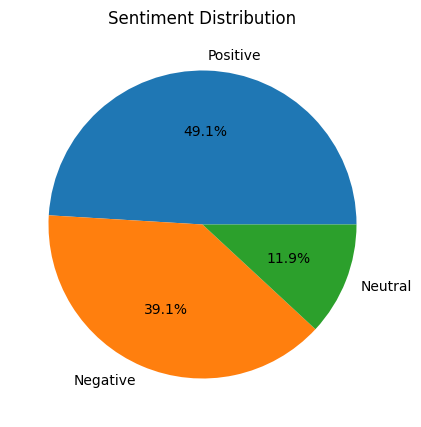

In [36]:
#PLotting a pie chart
plt.figure(figsize=(6,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()

We can see that positive review accounting for almost 50%

<Axes: >

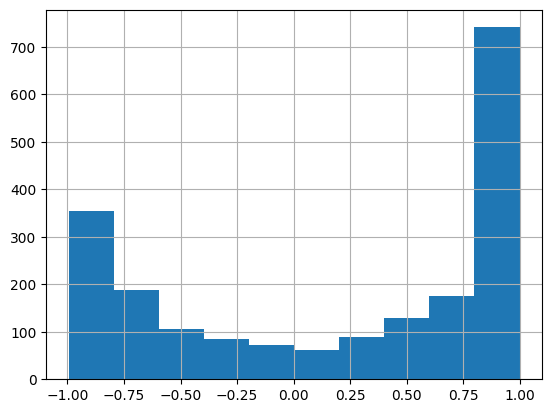

In [37]:
df['Compound_score'].hist()

In [38]:
df['seat_type'].value_counts()

seat_type
Economy Class      1118
Business Class      635
Premium Economy     173
First Class          74
Name: count, dtype: int64

In [39]:
df.tail()

,date_of_review,recommended,reviews,seat_type,type_of_traveller,route,cleaned_review,Compound_score,Sentiment
1995,2016-12-29,n,✅ Verified Review | Madrid to Montreal via Lo...,Economy Class,Family Leisure,DXB to LHR,"['madrid', 'montreal', 'via', 'london', 'heath...",0.5040,Positive
1996,2016-12-27,y,✅ Verified Review | Having read so many negat...,First Class,Solo Leisure,LAX to LHR,"['read', 'many', 'negative', 'review', 'site',...",0.9931,Positive
1997,2016-12-27,y,Flew London Gatwick to Tampa with British Airw...,Economy Class,Solo Leisure,LAX to LHR,"['flew', 'london', 'gatwick', 'tampa', 'britis...",0.9774,Positive
1998,2016-12-26,n,✅ Verified Review | My family and I were flyi...,Economy Class,Solo Leisure,LAX to LHR,"['family', 'flying', 'dubai', 'london', '19th'...",-0.8623,Negative
1999,2016-12-26,y,✅ Verified Review | Los Angeles to London Hea...,Premium Economy,Solo Leisure,LAX to LHR,"['los', 'angeles', 'london', 'heathrow', ',', ...",0.8555,Positive


In [40]:
df.drop("reviews",axis=1,inplace=True)
df.head()

,date_of_review,recommended,seat_type,type_of_traveller,route,cleaned_review,Compound_score,Sentiment
0,2024-04-12,n,Economy Class,Couple Leisure,Rotterdam to London City,"['chose', 'rotterdam', 'london', 'city', 'airp...",0.3818,Neutral
1,2024-04-10,n,Premium Economy,Solo Leisure,Kansas City to Dublin via Heathrow,"['entire', 'booking', 'ticketing', 'experience...",-0.9595,Negative
2,2024-04-10,n,Economy Class,Family Leisure,Tenerife to London,"['british', 'airway', 'cancelled', 'flight', '...",-0.7650,Negative
3,2024-04-07,y,Business Class,Business,Lisbon to San Diego,"['wanted', 'write', 'review', 'could', 'give',...",0.9651,Positive
4,2024-04-03,y,Business Class,Business,London Heathrow to Mumbai,"['check', 'fast', 'friendly', '.', 'security',...",0.9650,Positive


In [41]:
df.tail()

,date_of_review,recommended,seat_type,type_of_traveller,route,cleaned_review,Compound_score,Sentiment
1995,2016-12-29,n,Economy Class,Family Leisure,DXB to LHR,"['madrid', 'montreal', 'via', 'london', 'heath...",0.5040,Positive
1996,2016-12-27,y,First Class,Solo Leisure,LAX to LHR,"['read', 'many', 'negative', 'review', 'site',...",0.9931,Positive
1997,2016-12-27,y,Economy Class,Solo Leisure,LAX to LHR,"['flew', 'london', 'gatwick', 'tampa', 'britis...",0.9774,Positive
1998,2016-12-26,n,Economy Class,Solo Leisure,LAX to LHR,"['family', 'flying', 'dubai', 'london', '19th'...",-0.8623,Negative
1999,2016-12-26,y,Premium Economy,Solo Leisure,LAX to LHR,"['los', 'angeles', 'london', 'heathrow', ',', ...",0.8555,Positive


In [42]:
from wordcloud import WordCloud

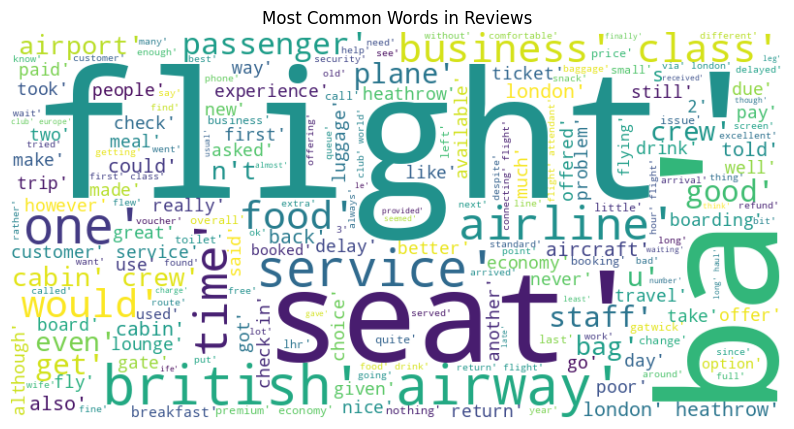

In [44]:
words = ' '.join(df['cleaned_review'])

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

# Plotting word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()